<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/machine_learning/gradient_descent_np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

This notebook contains implementations of gradient descent using Python and NumPy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def plot_graphs(x_vals, y_vals, y_preds=None):
    """
    Plots graphs with a uniform format
    """
    plt.figure(figsize=(4, 3))
    plt.scatter(x_vals, y_vals, s=5)

    if y_preds is not None:
        plt.scatter(x_vals, y_preds, c="r", s=2)

    plt.xlabel("x", fontsize=15, labelpad=5)
    plt.ylabel("y", fontsize=15, labelpad=10, rotation=0)
    plt.title("Data", fontsize=15)
    plt.show()


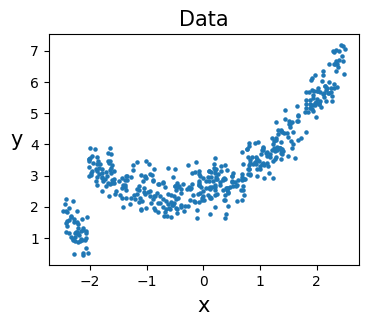

In [21]:
num_vals = 500
true_w = 0.5

# Generate random data
x_vals = np.sort(5*(np.random.random(num_vals) - 0.5))
y_vals = true_w*(x_vals +x_vals ** 2) + np.random.normal(0, 0.4, num_vals)
y_vals[int(num_vals * 0.1):] += 2.5

plot_graphs(x_vals, y_vals)

## Model

$\hat{y}$ = $w(x - x^2)$

In [22]:
def model(w, x):
    """
    Defines the data model
    """
    return w*x - w*x**2




## Loss function

$L(y, \hat{y}) = \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$



In [16]:
def get_loss(w, x_vals, y_vals):
    """
    Computes Mean Squared Error
    """
    return np.mean((model(w, x_vals) - y_vals)**2)


## Gradient descent functions

In [23]:
def get_gradient_numeric(w, x_vals, y_vals):
    """
    Numeric-based gradient descent
    """
    grad = np.mean(2*(x_vals - x_vals**2)*(model(w, x_vals) - y_vals))

    return grad

In [24]:
def get_gradient_limit(w, x_vals, y_vals):
    """
    Limit-based gradient descent
    """
    h = 0.0000001
    y_hat = model(w, x_vals)
    y_hat_h = model(w + h, x_vals)
    L = np.square(y_vals - y_hat)
    L_h = np.square(y_vals - y_hat_h)
    grad = np.mean((L_h - L)/h)

    return grad


## Initialisation

Run the cell below to view a plot of the initial curve before commencing gradient descent.

Loss:               12.5608
Numerical Gradient: 12.0589
Limit Gradient:     12.0590


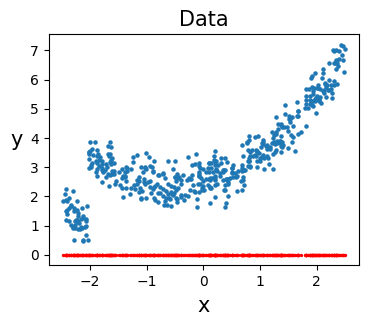

In [62]:
W_init = 0
lr = 0.01   # learning rate
step = 1
y_pred = model(W_init, x_vals)
loss = get_loss(W_init, x_vals, y_vals)

numerical_grad = get_gradient_numeric(W_init, x_vals, y_vals)
limit_gradient = get_gradient_limit(W_init, x_vals, y_vals)

print(f"Loss:               {loss:.4f}")
print(f"Numerical Gradient: {numerical_grad:.4f}")
print(f"Limit Gradient:     {limit_gradient:.4f}")

plot_graphs(x_vals, y_vals, y_pred)

## Gradient descent iteration

The cell below can be run successively to explore the effect of each additional iteration of gradient descent on the loss values, and view the resulting plot.

step=20. loss=8.926987550239806
Numerical Grad: 0.17359320401242304, 
Limit Grad: 0.1735942040071677


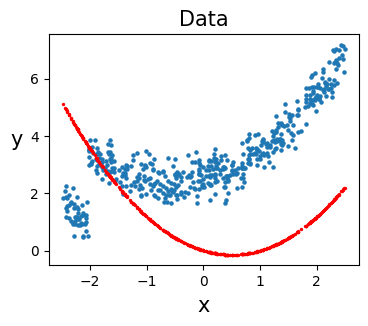

In [60]:
step += 1
new_W = W_init - lr*numerical_grad
W_init = new_W
y_pred = model(W_init, x_vals)
loss = get_loss(W_init, x_vals, y_vals)

numerical_grad = get_gradient_numeric(W_init, x_vals, y_vals)
limit_gradient = get_gradient_limit(W_init, x_vals, y_vals)

print(f"{step=}. {loss=}")
print(f"Numerical Grad: {numerical_grad}, "
f"\nLimit Grad: {limit_gradient}")

plot_graphs(x_vals, y_vals, y_pred)

In [61]:
print(W_init)

-0.5941277132309125
